**Vamos experimentar agora o algoritmo Decision Tree?**

In [58]:
#!pip -q install yellowbrick
#!pip install --upgrade scikit-learn
#!pip install optuna

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [60]:
import pickle
with open('content/sample_data/titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [61]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
 
# Carregando o dataset iris
iris = load_iris()
X, y = iris.data, iris.target
 
def objective(trial):
    # Definição do espaço de hiperparâmetros
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy']) # Para Classificação
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None, 0.5, 1.0])

    # Criação do modelo
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, random_state=42)
     
    # Treinamento do modelo
    model.fit(X_treino, y_treino)
     
    # Predição nos dados de teste
    y_pred = model.predict(X_teste)
     
    # Retorna a acurácia como objetivo
    return accuracy_score(y_teste, y_pred)
 
# Criação do estudo Optuna
study = optuna.create_study(direction='maximize') # Maximizar a acurácia
 
# Otimização
study.optimize(objective, n_trials=100) # número de tentativas
 
# Impressão dos melhores hiperparâmetros
print("Melhores hiperparâmetros:", study.best_params)
print("Melhor acurácia:", study.best_value)
 
# Treinamento do modelo com os melhores hiperparâmetros encontrados
modelo = DecisionTreeClassifier(**study.best_params, random_state=42)
modelo.fit(X_treino, y_treino)
y_pred = modelo.predict(X_teste)
accuracy = accuracy_score(y_teste, y_pred)
print(f"Acurácia do melhor modelo nos dados de teste: {accuracy}")

[I 2025-09-28 17:20:34,479] A new study created in memory with name: no-name-87eae7d3-0953-4d5a-b933-6e73b5cb1463
[I 2025-09-28 17:20:34,492] Trial 0 finished with value: 0.8100558659217877 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.8100558659217877.
[I 2025-09-28 17:20:34,502] Trial 1 finished with value: 0.8212290502793296 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8212290502793296.
[I 2025-09-28 17:20:34,511] Trial 2 finished with value: 0.7988826815642458 and parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 1 with value: 0.8212290502793296.
[I 2025-09-28 17:20:34,520] Trial 3 finished with value: 0.7932960893854749 and parameters: {'criterion': 'gini', 'max_depth': 27, '

Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 1.0}
Melhor acurácia: 0.8547486033519553
Acurácia do melhor modelo nos dados de teste: 0.8547486033519553


In [62]:
""" modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino) """

" modelo = DecisionTreeClassifier(criterion='entropy')\nY = modelo.fit(X_treino, y_treino) "



> **Vamos testar o modelo?**



In [63]:
previsoes = modelo.predict(X_teste)

In [64]:
previsoes

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])



> **Será se o modelo acertou?**



In [65]:
y_teste

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8547486033519553

In [67]:
import setuptools._distutils as _distutils
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[97,  8],
       [18, 56]])

/home/gabriel/Documentos/Projetos_git/Exercicios-IA-PUC/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8547486033519553

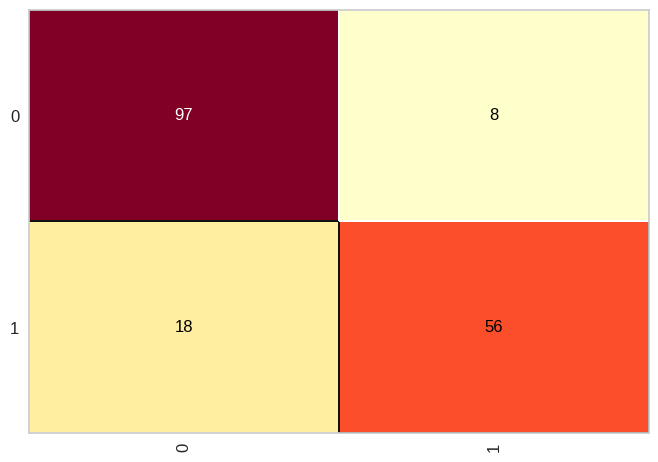

In [68]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [69]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       105
           1       0.88      0.76      0.81        74

    accuracy                           0.85       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.85      0.85       179



[0 1]


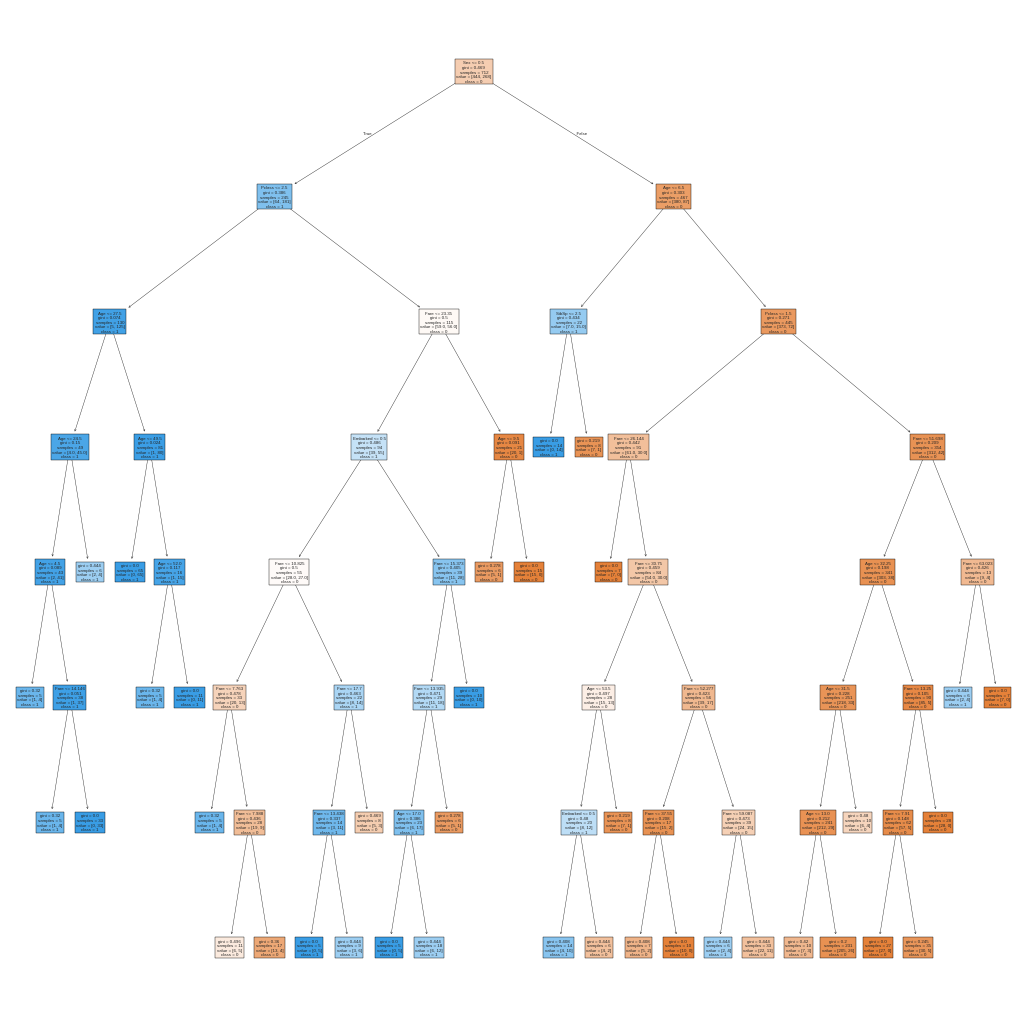

In [70]:
from sklearn import tree
previsores = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13,13))
print(modelo.classes_)
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_.astype(str), filled=True);